IMPORT STATMENTS

In [1]:
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt
import panel as pn
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas
import pandas as pd;
from panel.interact import interact, interactive, fixed, interact_manual
from panel import widgets
import pyam
import os
from datetime import datetime

import bokeh.plotting as bp
from bokeh.palettes import brewer
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import Spectral




pn.extension()
from pylab import * 
import plotly
import plotly.tools as tls
import plotly.figure_factory as ff
import chart_studio.plotly as py
import panel as pn
import bokeh
import string



%matplotlib inline

# data = pd.read_csv('occupancy.csv')
# data['date'] = data.date.astype('datetime64[ns]')
# data = data.set_index('date')

# data.tail()



<IPython.core.display.Javascript object>

SILVER CODE

In [2]:
#Setting SILVER dictionary
path = "/data/SILVER/"
print(os.getcwd())

os.chdir("../data/SILVER")
retval = os.getcwd()

print("Directory:", retval)
silver_plot_dictionary = dict()
silver_plot_dictionary["Iter1"] = dict(csv="SILVER_Supply-Iter1.csv" , titles=['Biomass','NG','Hydro','Wind','Import_Export','Curtailed'])
silver_plot_dictionary["Iter2"] = dict(csv="SILVER_Supply-Iter2.csv", titles = ['Biomass','Coal','NG','Fuel Oil','Hydro','Imported', 'Wind','Curtailed'])




C:\Users\Gamer\visualizations\folder
Directory: C:\Users\Gamer\visualizations\data\SILVER


In [3]:
import bokeh.plotting as bp
from bokeh.palettes import brewer
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import Spectral

#tool setup
TOOLTIPS = [("hour", "$index"),
    ("Load", "($y)"),]

#set up backgroudn and grid lines




def plotting_silver(scenario = "Iter1"):
   # print(silver_plot_dictionary[scenario][csv])
    df = pd.read_csv(silver_plot_dictionary[scenario]["csv"])
    df.index = pd.to_datetime(df['name'])
    df_2 = df.drop(columns=['name','Available Wind'],axis=1)
    df_3 = df_2.loc[pd.notnull(df_2.index)]
    df_3# create date filter using values from the range slider
     # store the first and last date range slider value in a var
   # start_date = date_range_slider.value[0] 
   # end_date = date_range_slider.value[1] 
     # create filter mask for the dataframe
    #mask = (df3['name'] > start_date) & (df['name'] <= end_date)
   # df3 = df3.loc[mask] # filter the dataframe
    
    
    
    
    output_file('stacked_area.html')
    date_range_slider = DateRangeSlider(value=(date(2012, 1, 1), date(2012, 12, 25)),
                                    start=date(2012, 1, 1), end=date(2012, 12, 25))
    title = 'Click on legend entries to hide the corresponding lines'
    p = figure(plot_width=1400, plot_height=700,x_axis_type='datetime',x_axis_label='Time',y_axis_label='MWH',title=title, tooltips=TOOLTIPS, toolbar_location="left")
    p.grid.minor_grid_line_color = '#eeeeee'
   # names = ['Biomass','NG','Hydro','Wind','Import_Export','Curtailed']
    names = silver_plot_dictionary[scenario]["titles"]


#data source
    mySource = bp.ColumnDataSource(df_3)

#the order of the names list changes the order of the stack
   # names = ['Biomass','NG','Hydro','Wind','Import_Export','Curtailed']

#create plots
    if scenario == "Iter1":
        pal = ["#A9D18E","#FFD966","#9DC3E6","#548235","#222A35","#A5A5A5"]
    else:
        pal = ["#A9D18E","#222A35","#C55A11","#A5A5A5","#9DC3E6","#FFD966","#548235", "#636363"]
    p.varea_stack(stackers=names, x='name',color=pal, legend_label=names, source=mySource)
    p.line(df_3.index,df_3['Demand'],color='black',line_width=2, legend_label='Load')

# reverse and move the legend entries to match the stacked order
    p.legend.items.reverse()
    p.legend.location = 'top_left'
    p.legend.click_policy='hide'
    return p

def change_dates(scenario="Iter1", view_fn=plotting_silver):
    return view_fn(scenario)

In [4]:
from datetime import date
from bokeh.models import CustomJS, DateRangeSlider


silver_interact_dict = dict(scenario=["Iter1","Iter2"])

silver_function = pn.interact(change_dates, **silver_interact_dict)


silver_text = "<br>\n# SILVER Model \n <b> Post-processed outputs from Canadian IAM \n \n Brief Description: \n \n SILVER is a model under development by the SESIT team. It includes optimal economic dispatch, day-ahead unit commitment, and optimal power flow with network constraints as separate modules working all together to create the most realistic representation of a province’s electricity network. It has several new features and improvements compared to other models in the domain. The model includes transmission expansion, storage, electric vehicles, and demand response. In conclusion, it can effectively assess different scenarios on renewable energy integration and pollutant types of retirement."
silver_plot = pn.Row(silver_function[1][0], pn.Column(silver_text, silver_function[0][0]))
#silver_plot.show()


creating dictionary and highlight options for transport


In [5]:

os.chdir("../transportation/")
retval = os.getcwd()

print("Directory:", retval)
transport_plot_dictionary = dict()

transport_plot_dictionary["January"] = dict(csv="Jan_EV_Load.csv" , titles=['Home','Other','Shopping','Work'])

transport_plot_dictionary["July"] = dict(csv="Jul_EV_Load.csv" , titles=['Home','Other','Shopping','Work'])


TOOLTIPS = [("hour", "$index"),
    ("Load", "($y)")]






Directory: C:\Users\Gamer\visualizations\data\transportation


parameter: Variable, used for getting dictionary value out and plotting

purpose: to plot our figures

returns: plotted figure

In [6]:
def plotting_transport(Variable):
    
  
    df = pd.read_csv(transport_plot_dictionary[Variable]["csv"])
    df.index = pd.to_datetime(df['Hour'])
    df_2 = df.drop(columns='Hour',axis=1)
     
    df_3 = df_2.dropna(how='all', axis='columns')
    
    df_4 = df_3.drop(columns='Unnamed: 61')
    df_4['Total'] = df_4['Home'] + df_4['Other'] + df_4['Shopping'] + df_4['Work']
    
   
    
    #set up background and grid lines
    #TODO: Confirm the untis are MWH
    output_file('TRANSPORT_stacked_area.html')
    width = 1500
    height = 500
    title = 'Click on legend entries to hide the corresponding lines'
    p = figure(plot_width=width, plot_height=height,x_axis_type='datetime',x_axis_label='Time',y_axis_label='MWH',title=title, tooltips=TOOLTIPS, toolbar_location="left")
    p.grid.minor_grid_line_color = '#eeeeee'

    #data source
    mySource = bp.ColumnDataSource(df_4)

    #the order of the names list changes the order of the stack
    names = ['Home','Other','Shopping','Work']

    #create plots
    p.varea_stack(stackers=names, x='Hour',color=Spectral[len(transport_plot_dictionary[Variable]["titles"])], legend_label=names, source=mySource)
    p.line(df_4.index,df_4['Total'],color='black',line_width=2, legend_label='Load')

    # reverse and move the legend entries to match the stacked order
    p.legend.items.reverse()
    p.legend.location = 'top_left'
    p.legend.click_policy='hide'

    return p

"refresher function" that gets called everytime you pick a dropdown option in the app

In [7]:
def change_transport_scenario(Variable = 'January', view_fn=plotting_transport):
    return view_fn(Variable)

In [8]:
transport_text = "<br>\n# Transport Model \n <b> Post-processed outputs from the Transportation framework \n \n Brief Description: \n \n The transportation model currently under development by the SESIT team, is based on TASHA. TASHA is maintained and developed at the University of Toronto. The basic goal for TASHA is to model the Greater Toronto Area’s transportation system. The model can capture EV usage and behavioural aspects, which is a great candidate to calculate the demand in the selected geographical domain. An additional model is integrated within this framework to simulate the EV charging schedule. The charging model translates each person’s travel activities to the EV’s usage in a household. The battery capacity, rates of charging, and depletion are the other aspects modelled in the charging model."
transport_interact_dict = dict(Variable=["January","July"])
transport_function = pn.interact(change_transport_scenario, **transport_interact_dict)
#i = pn.interact(ex_fig_general, **kw)

transport_plot = pn.Row(transport_function[1][0], pn.Column(transport_text, transport_function[0][0]))
#transport_plot.show()

In [9]:

os.chdir("../copper/")
retval = os.getcwd()

print("Directory:", retval)
copper = pd.read_csv('CRESTv4_data.csv')
COPPER_YEAR_LIST = [2020,2030,2050]
copper.head()

Directory: C:\Users\Gamer\visualizations\data\copper


Unnamed: 0   Model Scenario            Region          Variable Unit  \
0           0  COPPER    CTax0  British Columbia   capacity|gas cc   MW   
1           1  COPPER    CTax0  British Columbia   capacity|gas sc   MW   
2           2  COPPER    CTax0  British Columbia     capacity|coal   MW   
3           3  COPPER    CTax0  British Columbia  capacity|nuclear   MW   
4           4  COPPER    CTax0  British Columbia    capacity|hydro   MW   

       2020         2030         2050  
0    480.20  1411.176759  3692.836606  
1     46.00     0.000000     0.000000  
2      0.00     0.000000     0.000000  
3      0.00     0.000000     0.000000  
4  16577.33     0.000000     0.000000

In [10]:
copper_df = pyam.IamDataFrame(copper)

In [11]:
capacity_title_list = ["capacity|gas cc" , "capacity|gas sc", "capacity|coal", "capacity|nuclear", "capacity|hydro", "capacity|wind","capacity|solar","capacity|waste","capacity|diesel"]
emissions_title_list = ["Emissions|Carbon"]


copper_plot_dictionary = dict()
copper_plot_dictionary["capacity*"] = dict(titles=capacity_title_list)
copper_plot_dictionary["Emissions*"]= dict(titles=emissions_title_list)

In [12]:
def copper_plot_figure(plot_name, region, scenario):
   
    all_y_data = [] # (list of lists)
    new_y_title_list = []
    y_tile_list = copper_plot_dictionary[plot_name]["titles"]
   
  
    for y_title in y_tile_list:
        y_data = produce_value_list(y_title, plot_name, copper_plot_dictionary, scenario, region)
       
        if len(y_data) > 0:
            all_y_data.append(y_data)
            new_y_title_list.append(y_title)
        else:
            print("FOUND EMPTY DATASET: EXCLUDING")
    
   
    fig = Figure()
    FigureCanvas(fig) # not needed in mpl >= 3.1
    fig.set_size_inches(18.5, 10.5)
    ax = fig.add_subplot()
    pal = ["A5A5A5", "636363","222A35","7030A0","9DC3E6","548235","FFD966","A9D18E","C55A11"]
    ax.stackplot(COPPER_YEAR_LIST, *all_y_data, labels=new_y_title_list, colors=pal)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])
    
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 18})
    return fig

In [13]:
def copper_create_df(Variable, scenario, region):
    os.chdir("../copper/")
    v_df = copper_df.filter(scenario = scenario,
               variable = Variable,region = region)
    return v_df


In [14]:
def produce_value_list(title, Variable, copper_plot_dictionary, scenario, region):
   
    plotyrs = COPPER_YEAR_LIST
    plot_df = copper_create_df(Variable, scenario, region)
    filtered_plot_df = plot_df.filter(scenario = scenario, variable = title, year = plotyrs)
    container = []
    
    for i in filtered_plot_df.data.values:
        bar = str(i)    
        num_value = string_to_value(bar)
        num = float(num_value)       
        container.append(num)
  
    return container

%matplotlib inline
# magic function in Python

def string_to_value(long_string):
        long_string.replace("]","0")
        #print(long_string)
        
        split_string = long_string.split(" ")
      
        value = split_string[-1]
        value = value.rstrip(value[-1])
       
        #value = value[:-1]
        print(split_string)
        print(split_string[-1])
        return value

In [15]:
def copper_change_plot(Variable, region, scenario, view_fn=copper_plot_figure,  copper_text="Hi There!"):
    os.chdir("../copper/")
    return view_fn(Variable, region, scenario)

In [16]:
copper_text = "<br>\n# COPPER Model \n <b> Post-processed outputs from Canadian capacity expansion model \n \n Brief Description: \n \n COPPER (Canadian Opportunities for Planning and Production of Electricity Resources) is a capacity expansion model that is developed by the SESIT team at the University of Victoria. It accounts for the least cost solution representing the national Canadian electricity system with given demand, policy, and constraint—the span of time which COPPER models is from the s 2020 to 2050. The development of COPPER comes with an introduction of new features and improvements compared to those of other models and its own predecessor. Dynamic modelling, the introduction of hydro development in the model, and recontacting availability are some of the key qualities that make COPPER distinguishable. Other than these new features, it also has a very fine spatial resolution representing VRE (Variable Renewable Energy) within the model"
copper_interact_dict = dict(Variable=["capacity*","Emissions*"],
                            region = ["Canada","Alberta" ,"British Columbia", "Manitoba", "New Brunswick", "Newfoundland and Labrador",                              
                                    "Nova Scotia", "Ontario", "Prince Edward Island", "Quebec","Saskatchewan"], 
                            scenario =["CTax0", "CTax50", "CTax100", "CTax150", "CTax200"],  copper_text="Hi There!")


copper_function = pn.interact(copper_change_plot, **copper_interact_dict)
copper_function.pprint()


copper_plot = pn.Row(copper_function[1][0], pn.Column(copper_text, copper_function[0][0],copper_function[0][2],copper_function[0][1]))
copper_plot.show()


["['COPPER'", "'CTax0'", "'Canada'", "'capacity|gas", "cc'", "'MW'", '2020', '450', '12298.479]']
12298.479]
["['COPPER'", "'CTax0'", "'Canada'", "'capacity|gas", "cc'", "'MW'", '2030', '450\n', '17073.101590000002]']
17073.101590000002]
["['COPPER'", "'CTax0'", "'Canada'", "'capacity|gas", "cc'", "'MW'", '2050', '450', '35404.49261]']
35404.49261]
["['COPPER'", "'CTax0'", "'Canada'", "'capacity|gas", "sc'", "'MW'", '2020', '451', '11066.95]']
11066.95]
["['COPPER'", "'CTax0'", "'Canada'", "'capacity|gas", "sc'", "'MW'", '2030', '451', '3460.267482]']
3460.267482]
["['COPPER'", "'CTax0'", "'Canada'", "'capacity|gas", "sc'", "'MW'", '2050', '451', '1448.7]']
1448.7]
["['COPPER'", "'CTax0'", "'Canada'", "'capacity|coal'", "'MW'", '2020', '452', '8688.0]']
8688.0]
["['COPPER'", "'CTax0'", "'Canada'", "'capacity|coal'", "'MW'", '2030', '452', '5962.882077]']
5962.882077]
["['COPPER'", "'CTax0'", "'Canada'", "'capacity|coal'", "'MW'", '2050', '452', '2984.0]']
2984.0]
["['COPPER'", "'CTax0'

In [17]:
import bokeh.plotting as bp
from bokeh.palettes import brewer
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import Category20
os.chdir("../buildings/")
retval = os.getcwd()

plot_dictionary = dict()
plot_dictionary["Scenario 1"] = dict(csv="Scenario1a.csv" , titles = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17'])
plot_dictionary["Scenario 2"] = dict(csv="Scenario2a.csv", titles = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17'])
plot_dictionary["Scenario 3"] = dict(csv="Scenario3a.csv" , titles=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17'])
plot_dictionary["Scenario 4"] = dict(csv="Scenario4a.csv", titles = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17'])
plot_dictionary["Scenario 5"] = dict(csv="Scenario5a.csv" , titles=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17'])
plot_dictionary["Scenario 6"] = dict(csv="Scenario6a.csv", titles = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17'])
plot_dictionary["Scenario 7"] = dict(csv="Scenario7a.csv" , titles=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17'])
plot_dictionary["Scenario 8"] = dict(csv="Scenario8a.csv", titles = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17'])
plot_dictionary["Scenario 9"] = dict(csv="Scenario9a.csv" , titles=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17'])
plot_dictionary["Scenario 10"] = dict(csv="Scenario10a.csv", titles = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17'])
#tool setup
# TODO: change $index to the the format into datetime isntead of jsut a count of hours
TOOLTIPS = [("hour", "$index"),
    ("Load", "($y)"),]


def plotting_buildings(scenario = "Scenario 1"):
    
    df = pd.read_csv(plot_dictionary[scenario]["csv"])
    df.index = pd.to_datetime(df['Hourly'])
    df_2 = df.drop(columns='Hourly')
    df_2['Total'] = df_2.sum(axis=1)
    
    
    
    
    
    #set up backgroudn and grid lines
    #TODO: Confirm the untis are MWH
    output_file('BUILDINGS_stacked_area.html')
    width = 1500
    height = 500
    title = scenario
    
    
    p = figure(plot_width=width, plot_height=height,x_axis_type='datetime',x_axis_label='Time',y_axis_label='MWH',title=title, tooltips=TOOLTIPS, toolbar_location="left")
    p.grid.minor_grid_line_color = '#eeeeee'


    #data source
    mySource = bp.ColumnDataSource(df_2)

    #the order of the names list changes the order of the stack
    #TODO: This can be done better tahn typing it out but i cant quite get it working.  see 2 attempted methods below:
    #names = list(range(1,18))
    #names = list(df_2.columns.values) 
    names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17']

    print(len(names))
    print(names)
    #create plots
    #NOTE: Had to cahge plot colour pallets b/c prectral only has 11 colours. see avalible pallets here: https://docs.bokeh.org/en/latest/docs/reference/palettes.html
    p.varea_stack(stackers=names, x='Hourly',color=Category20[17], legend_label=names, source=mySource)
    p.line(df_2.index,df_2['Total'],color='black',line_width=2, legend_label='Load')

    
    
    
    # reverse and move the legend entries to match the stacked order
    p.legend.items.reverse()
    p.legend.location = 'top_left'
    p.legend.click_policy='hide'
    return p

def change_scenario(scenario = "Scenario 1", view_fn=plotting_buildings):
    return view_fn(scenario)

In [18]:
buildings_text = "<br>\n# Buildings Model \n <b>Post-processed outputs from the Buildings framework \n \n Brief Description: \n \n The model developed by the SESIT team is designed to simulate the archetypes energy use in the city of Regina, based on the physical characteristics and their dwellers’ rational behaviour. It uses the EnergyPlus modelling tool to assess the energy consumption and scaling and calibrating the results come afterward. Several archetypes are introduced in this model, then scaled up to represent the whole city’s building sector."


interact_dict = dict(scenario=["Scenario 1","Scenario 2", "Scenario 3","Scenario 4","Scenario 5","Scenario 6","Scenario 7","Scenario 8","Scenario 9","Scenario 10"])

buildings_function = pn.interact(change_scenario, **interact_dict)

buildings_plot = pn.Row(buildings_function[1][0], pn.Column(buildings_text, buildings_function[0][0]))


17
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17']


And we've written some code that smooths a time series and plots it using Matplotlib with outliers highlighted:

In [19]:
# from matplotlib.figure import Figure
# from matplotlib.backends.backend_agg import FigureCanvas

# %matplotlib inline

# def mpl_plot(avg, highlight):
#     fig = Figure()
#     FigureCanvas(fig) # not needed in mpl >= 3.1
#     ax = fig.add_subplot()
#     avg.plot(ax=ax)
#     if len(highlight): highlight.plot(style='o', ax=ax)
#     return fig

# def find_outliers(variable='Temperature', window=30, sigma=10, view_fn=mpl_plot):
#     avg = data[variable].rolling(window=window).mean()
#     residual = data[variable] - avg
#     std = residual.rolling(window=window).std()
#     outliers = (np.abs(residual) > std * sigma)
#     return view_fn(avg, avg[outliers])

We can call the function with parameters and get a plot:

In [20]:
# find_outliers(variable='Temperature', window=20, sigma=10)

It works! But exploring all these parameters by typing Python is slow and tedious. Plus we want our boss, or the boss's boss, to be able to try it out.

If we wanted to try out lots of combinations of these values to understand how the window and sigma affect the plot, we could reevaluate the above cell lots of times, but that would be a slow and painful process, and is only really appropriate for users who are comfortable with editing Python code. In the next few examples we will demonstrate how to use Panel to quickly add some interactive controls to some object and make a simple app. 

To see an overview of the different APIs Panel offers see the [API user guide](../user_guide/APIs.ipynb) and for a quick reference for various Panel functionality see the [overview](../user_guide/Overview.ipynb).

## Interactive Panels

Instead of editing code, it's much quicker and more straightforward to use sliders to adjust the values interactively.  You can easily make a Panel app to explore a function's parameters using `pn.interact`, which is similar to the [ipywidgets interact function](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html):

In [21]:
# import panel as pn
# pn.extension()

# pn.interact(find_outliers)

As long as you have a live Python process running, dragging these widgets will trigger a call to the `find_outliers` callback function, evaluating it for whatever combination of parameter values you select and displaying the results. A Panel like this makes it very easy to explore any function that produces a visual result of a [supported type](https://github.com/pyviz/panel/issues/2), such as Matplotlib (as above), Bokeh, Plotly, Altair, or various text and image types.

## Components of Panels

`interact` is convenient, but what if you want more control over how it looks or works?  First, let's see what `interact` actually creates, by grabbing that object and displaying its representation:

In [22]:
# kw = dict(window=(1, 60), variable=sorted(list(data.columns)), sigma=(1, 20))
# j = pn.interact(find_outliers, **kw)
# j.pprint()

As you can see, the `interact` call created a `pn.Column` object consisting of a WidgetBox (with 3 widgets) and a `pn.Row` with one Matplotlib figure object.  Panel is compositional, so you can mix and match these components any way you like, adding other objects as needed:

In [23]:
# text = "<br>\n# Room Occupancy\nSelect the variable, and the time window for smoothing"

# r = pn.Row(j[1][0], pn.Column(text, j[0][0], j[0][1]))
# r

In [24]:
os.chdir("../message/")
retval = os.getcwd()
report_df = pd.read_csv('MESSAGE_CANADA_v1.csv')
report_df.drop(columns = 'Unnamed: 0', inplace = True)

report_df.head()

Model      Scenario  Region                  Variable Unit  \
0  MESSAGEix-Canada  Baseline-NDC  Canada          capacity|LNG_exp  NaN   
1  MESSAGEix-Canada  Baseline-NDC  Canada   capacity|adipic_thermal  NaN   
2  MESSAGEix-Canada  Baseline-NDC  Canada  capacity|ammonia_secloop  NaN   
3  MESSAGEix-Canada  Baseline-NDC  Canada          capacity|bio_hpl  NaN   
4  MESSAGEix-Canada  Baseline-NDC  Canada     capacity|bio_hpl__air  NaN   

   1950  1955  1960  1965  1970  ...  2015      2020      2025      2030  \
0     0     0     0     0     0  ...     0  0.000000  2.962856  2.962856   
1     0     0     0     0     0  ...     0  0.000963  0.002513  0.005010   
2     0     0     0     0     0  ...     0  0.000000  0.000000  0.000000   
3     0     0     0     0     0  ...     0  0.000000  0.000000  0.000000   
4     0     0     0     0     0  ...     0  0.000000  0.000000  0.000000   

       2035      2040      2045      2050      2055      2060  
0  2.962856  2.962856  2.962856  0.000000  0.000000  2.962856  
1  0.009031  0.015507  0.025937  0.036125  0.047558  0.049841  
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.292965  
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  

[5 rows x 28 columns]

In [25]:
report_df["Variable"] = report_df["Variable"].str.replace('emis', 'Emissions', regex = False)
#report_df["Variable"] = report_df["Variable"].str.replace('in|final|', 'Final Energy|', regex = False)
report_df["Variable"] = report_df["Variable"].str.replace('out|final|', 'Final Energy|', regex = False)
#report_df["Variable"] = report_df["Variable"].str.replace('in|primary|', 'Primary Energy|', regex = False)
report_df["Variable"] = report_df["Variable"].str.replace('out|primary|', 'Primary Energy|', regex = False)
report_df["Variable"] = report_df["Variable"].str.replace('in|renewable|', 'Primary Energy|renewable|', regex = False)
report_df["Variable"] = report_df["Variable"].str.replace('out|renewable|', 'Primary Energy|renewable|', regex = False)
report_df["Variable"] = report_df["Variable"].str.replace('total om cost|', 'Total Costs|', regex = False)
report_df["Variable"] = report_df["Variable"].str.replace('out|useful|', 'Useful Energy|', regex = False)
report_df["Variable"] = report_df["Variable"].str.replace('in|useful|', 'Useful Energy|', regex = False)
# report_df1["Variable"] = report_df1["Variable"].str.replace('emis', 'Emissions', regex = False)
# report_df1["Variable"] = report_df1["Variable"].str.replace('in|final|', 'Final Energy|', regex = False)
# report_df1["Variable"] = report_df1["Variable"].str.replace('in|primary|', 'Primary Energy|', regex = False)
# report_df1["Variable"] = report_df1["Variable"].str.replace('total om cost|', 'Total Costs|', regex = False)
# report_df1["Variable"] = report_df1["Variable"].str.replace('in|renewable|', 'Primary Energy|renewable|', regex = False)
# report_df1["Variable"] = report_df1["Variable"].str.replace('out|useful|', 'Useful Energy|', regex = False)

In [26]:
plotyrs = [2020,2025,2030,2035,2040,2045,2050,2055,2060]
pyam_df = pyam.IamDataFrame(report_df)
pdf = pyam_df.copy()

In [27]:
biomass = ['Primary Energy|biomass|bio_istig_ccs|M1', 
'Primary Energy|biomass|bio_istig|M1']
#'Primary Energy|biomass|bio_ppl|M1',
#'Primary Energy|biomass|biomass_nc|M1',
#'Primary Energy|biomass|biomass_t_d|M1',
#'Primary Energy|biomass|eth_bio_ccs|M1',
#'Primary Energy|biomass|eth_bio|M1',
#'Primary Energy|biomass|gas_bio|M1',
#'Primary Energy|biomass|h2_bio_ccs|M1',
#'Primary Energy|biomass|h2_bio|M1',
#'Primary Energy|biomass|liq_bio_ccs|M1',
#'Primary Energy|biomass|liq_bio|M1','Primary Energy|biomass|land_use_biomass|M1']

lng = 'Primary Energy|LNG|LNG_bal|M1'

coal = ['Primary Energy|coal|coal_bal|M1',
                      'Primary Energy|coal|coal_exp|M1',
                      'Primary Energy|coal|coal_exp|M1',
                      'Primary Energy|coal|coal_extr_ch4|M1',
                      'Primary Energy|coal|coal_extr|M1',
                      'Primary Energy|coal|lignite_extr|M1']
gas = [#'Primary Energy|gas|gas_bal|M1',
    'Primary Energy|gas|gas_extr_1|M1',
      'Primary Energy|gas|gas_extr_2|M1',
      'Primary Energy|gas|gas_extr_3|M1',
      'Primary Energy|gas|gas_extr_4|M1',
      'Primary Energy|gas|gas_extr_5|M1',
      'Primary Energy|gas|gas_extr_6|M1']
      #'Primary Energy|gas|LNG_prod|M1']
      # 'Primary Energy|LNG|LNG_bal|M1']

oil = [#'Primary Energy|crudeoil|oil_bal|M1',
    'Primary Energy|crudeoil|oil_exp|M1',
     # 'Primary Energy|crudeoil|oil_extr_1_ch4|M1',
        'Primary Energy|crudeoil|oil_extr_1|M1',
       # 'Primary Energy|crudeoil|oil_extr_2_ch4|M1',
        'Primary Energy|crudeoil|oil_extr_2|M1',
      #  'Primary Energy|crudeoil|oil_extr_3_ch4|M1',
        'Primary Energy|crudeoil|oil_extr_3|M1',
        #'Primary Energy|crudeoil|oil_extr_4_ch4|M1',
        'Primary Energy|crudeoil|oil_extr_4|M1',
        'Primary Energy|crudeoil|oil_extr_5|M1',
        'Primary Energy|crudeoil|oil_extr_6|M1',
        'Primary Energy|crudeoil|oil_extr_7|M1']

hydro = ['Primary Energy|renewable|hydro|hydro_hc|M1',  'Primary Energy|renewable|hydro|hydro_lc|M1']

biomass_renew = ['Primary Energy|renewable|biomass|bio_extr_a|M1',
                'Primary Energy|renewable|biomass|bio_extr_b|M1',
                'Primary Energy|renewable|biomass|bio_extr_c|M1',
                'Primary Energy|renewable|biomass|bio_extr_d|M1',
                'Primary Energy|renewable|biomass|bio_extr_e|M1',
                'Primary Energy|renewable|biomass|bio_extr_f|M1',
                'Primary Energy|renewable|biomass|bio_extr_g|M1']

solar = ['Primary Energy|renewable|solar_pv|solar_pv_ppl|M1' , 
         'Primary Energy|renewable|solar_th|solar_th_ppl|M1']


wind = ['Primary Energy|renewable|wind|wind_ppf|M1', 'Primary Energy|renewable|wind|wind_ppl|M1']

lh2 = ['Primary Energy|lh2|lh2_bal|M1', 'Primary Energy|lh2|lh2_exp|M1']

ethanol = ['Primary Energy|methanol|meth_bal|M1',  'Primary Energy|methanol|meth_exp|M1']

methanol = ['Primary Energy|ethanol|eth_bal|M1', 'Primary Energy|ethanol|eth_exp|M1']



In [28]:
pdf = pyam_df.copy()

In [29]:
pdf.aggregate(
    "Primary Energy|coal",
    components=coal,
    append=True
)


pdf.aggregate(
    "Primary Energy|renewable|solar",
    components=solar,
    append=True
)

pdf.aggregate(
    "Primary Energy|renewable|hydro",
    components=hydro,
    append=True
)

pdf.aggregate(
    "Primary Energy|ethanol",
    components=ethanol,
    append=True
)
pdf.aggregate(
    "Primary Energy|methanol",
    components=methanol,
    append=True
)
pdf.aggregate(
    "Primary Energy|Liq. Hydrogen",
    components=lh2,
    append=True
)
pdf.aggregate(
    "Primary Energy|renewable|wind",
    components=wind,
    append=True
)

pdf.aggregate(
    "Primary Energy|renewable|biomass",
    components= biomass_renew,
    append=True
)


pdf.aggregate(
    "Primary Energy|biomass",
    components= biomass,
    append=True
)

pdf.aggregate(
    "Primary Energy|oil",
    components=oil,
    append=True
)

pdf.aggregate(
    "Primary Energy|gas",
    components=gas,
    append=True
)

pdf.aggregate(
    "Primary Energy|LNG",
    components=lng,
    append=True
)

pyam - INFO: Running in a notebook, setting up a basic logging config at level INFO
pyam.utils - WARNING: Formatted data is empty!
pyam.utils - WARNING: Formatted data is empty!
pyam.utils - WARNING: Formatted data is empty!
pyam.utils - WARNING: Formatted data is empty!
pyam.utils - WARNING: Formatted data is empty!
pyam.utils - WARNING: Formatted data is empty!
pyam.utils - WARNING: Formatted data is empty!


In [30]:
#pdf.filter(variable = 'Primary Energy|oil').timeseries()

In [31]:
primary_df = pdf.filter(scenario = 'Baseline*', variable=["Primary Energy|renewable|solar",
                                            #"Primary Energy|LNG",
                                            "Primary Energy|gas",
                                            "Primary Energy|oil",
                                            "Primary Energy|biomass",
                                                "Primary Energy|renewable|wind",
                                            "Primary Energy|Liq. Hydrogen",
                                            "Primary Energy|methanol",
                                            "Primary Energy|ethanol",
                                            "Primary Energy|renewable|hydro",
                                            "Primary Energy|renewable|biomass",
                                            "Primary Energy|methanol",
                                           "Primary Energy|coal"],
              year = plotyrs)

In [32]:
i_feed = ['Useful Energy|i_feed|ethanol_fs|M1', 'Useful Energy|i_feed|gas_fs|M1',
         'Useful Energy|i_feed|loil_fs|M1', 'Useful Energy|i_feed|methanol_fs|M1']

transport = ['Useful Energy|transport|coal_trp|M1',
            'Useful Energy|transport|elec_trp|M1',
            'Useful Energy|transport|eth_fc_trp|M1',
            'Useful Energy|transport|eth_ic_trp|M1',
            'Useful Energy|transport|foil_trp|M1',
            'Useful Energy|transport|gas_trp|M1',
            'Useful Energy|transport|h2_fc_trp|M1',
            'Useful Energy|transport|loil_trp|M1',
            'Useful Energy|transport|meth_fc_trp|M1',
            'Useful Energy|transport|meth_ic_trp|M1']


i_spec = ['Useful Energy|i_spec|h2_fc_I|M1',
          'Useful Energy|i_spec|sp_coal_I|M1',
          'Useful Energy|i_spec|sp_el_I|M1',
          'Useful Energy|i_spec|sp_eth_I|M1',
          'Useful Energy|i_spec|sp_liq_I|M1',
          'Useful Energy|i_spec|sp_meth_I|M1']

i_therm =   ['Useful Energy|i_therm|biomass_i|M1',
            'Useful Energy|i_therm|coal_i|M1',
            'Useful Energy|i_therm|elec_i|M1',
            'Useful Energy|i_therm|eth_i|M1',
            'Useful Energy|i_therm|foil_i|M1',
            'Useful Energy|i_therm|gas_i|M1',
            'Useful Energy|i_therm|h2_fc_I|M1',
            'Useful Energy|i_therm|h2_i|M1',
            'Useful Energy|i_therm|heat_i|M1',
            'Useful Energy|i_therm|hp_el_i|M1',
            'Useful Energy|i_therm|hp_gas_i|M1',
            'Useful Energy|i_therm|loil_i|M1',
            'Useful Energy|i_therm|meth_i|M1',
            'Useful Energy|i_therm|solar_i|M1']
rc_spec = ['Useful Energy|rc_spec|h2_fc_RC|M1',
          'Useful Energy|rc_spec|sp_el_RC|M1']

rc_therm = ['Useful Energy|rc_therm|biomass_rc|M1',
            'Useful Energy|rc_therm|coal_rc|M1',
            'Useful Energy|rc_therm|eth_rc|M1',
            'Useful Energy|rc_therm|foil_rc|M1',
            'Useful Energy|rc_therm|gas_rc|M1',
            'Useful Energy|rc_therm|h2_fc_RC|M1',
            'Useful Energy|rc_therm|h2_rc|M1',
            'Useful Energy|rc_therm|heat_rc|M1',
            'Useful Energy|rc_therm|hp_el_rc|M1',
            'Useful Energy|rc_therm|hp_gas_rc|M1',
            'Useful Energy|rc_therm|loil_rc|M1',
            'Useful Energy|rc_therm|meth_rc|M1',
            'Useful Energy|rc_therm|solar_rc|M1']

biom = ['Useful Energy|non-comm|biomass_nc|M1']

In [33]:
df_useful = pyam_df.copy()
# df_useful.aggregate(
#     "Useful Energy|non-Commercial biomass",
#     components=biom,
#     append=True
# )

df_useful.aggregate(
    "Useful Energy|residential/commercial thermal",
    components=rc_therm,
    append=True
)

df_useful.aggregate(
    "Useful Energy|residential/commercial specific",
    components=rc_spec,
    append=True
)

df_useful.aggregate(
    "Useful Energy|industrial thermal",
    components=i_therm,
    append=True
)

df_useful.aggregate(
    "Useful Energy|industrial specific",
    components=i_spec,
    append=True
)

df_useful.aggregate(
    "Useful Energy|industrial feedstock",
    components=i_feed,
    append=True
)

df_useful.aggregate(
    "Useful Energy|transport",
    components=i_therm,
    append=True
)


<ipython-input-34-25c6233c6186>:1: DeprecationWarning:

This method is deprecated and will be removed in future versions. Please use `IamDataFrame.plot.stack()`.



<AxesSubplot:title={'center':'Demands by sector'}, xlabel='Year', ylabel='GWa'>

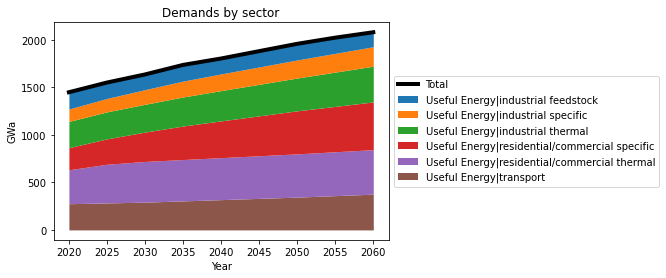

In [34]:
df_useful.filter(scenario = 'Baseline*', variable=[
    "Useful Energy|non-Commercial biomass",
    "Useful Energy|residential/commercial thermal",
    "Useful Energy|residential/commercial specific",
    "Useful Energy|industrial thermal",
    "Useful Energy|industrial specific",
    "Useful Energy|industrial feedstock",
    "Useful Energy|transport"],
              year = plotyrs).stack_plot(total=True,
                                         title = 'Demands by sector')

In [35]:
cement = ['Emissions|CO2|cement_CO2|M1']
coal = ['Emissions|CO2|coal_extr_ch4|M1',
        'Emissions|CO2|coal_extr|M1',
        'Emissions|CO2|coal_imp|M1']
foil = ['Emissions|CO2|foil_imp|M1']
gas = ['Emissions|CO2|gas_extr_1|M1',
        'Emissions|CO2|gas_extr_2|M1',
        'Emissions|CO2|gas_extr_3|M1',
        'Emissions|CO2|gas_extr_4|M1',
        'Emissions|CO2|gas_extr_5|M1',
        'Emissions|CO2|gas_extr_6|M1'
        ]
lignite = ['Emissions|CO2|lignite_extr|M1']
loil = ['Emissions|CO2|loil_imp|M1']
meth_ccs = ['Emissions|CO2|meth_coal_ccs|M1']
oil = ['Emissions|CO2|oil_extr_1_ch4|M1',
    'Emissions|CO2|oil_extr_1|M1',
    'Emissions|CO2|oil_extr_2_ch4|M1',
    'Emissions|CO2|oil_extr_2|M1',
    'Emissions|CO2|oil_extr_3_ch4|M1',
    'Emissions|CO2|oil_extr_3|M1',
    'Emissions|CO2|oil_extr_4_ch4|M1',
    'Emissions|CO2|oil_extr_4|M1',
    'Emissions|CO2|oil_extr_5|M1',
    'Emissions|CO2|oil_extr_6|M1',
    'Emissions|CO2|oil_extr_7|M1']

oil_trade = ['Emissions|CO2|foil_imp|M1',
             'Emissions|CO2|loil_exp|M1',
            'Emissions|CO2|loil_imp|M1',
             'Emissions|CO2|oil_imp|M1']
       
gas_trade = ['Emissions|CO2|LNG_exp|M1',
            'Emissions|CO2|LNG_imp|M1',
            'Emissions|CO2|gas_imp|M1']
            #'Emissions|CO2|LNG_exp|M1']

In [36]:
df_emis_b = pyam_df.filter(variable = 'Emissions|CO2|*',year = plotyrs)

In [37]:
df_emis_b.to_csv('emissions.csv')

In [38]:
df_emis = pyam_df.copy()


df_emis.aggregate(
    "Emissions|CO2|gas",
    components=gas,
    append=True
)

df_emis.aggregate(
    "Emissions|CO2|oil",
    components=oil,
    append=True
)

df_emis.aggregate(
    "Emissions|CO2|coal",
    components=coal,
    append=True
)

df_emis.aggregate(
    "Emissions|CO2|cement",
    components=cement,
    append=True
)

df_emis.aggregate(
    "Emissions|CO2|oil trade",
    components=oil_trade,
    append=True
)

df_emis.aggregate(
    "Emissions|CO2|gas trade",
    components=gas_trade,
    append=True
)

<ipython-input-39-30ea23e2935e>:1: DeprecationWarning:

This method is deprecated and will be removed in future versions. Please use `IamDataFrame.plot.stack()`.



<AxesSubplot:title={'center':'CO2 Emissions - Baseline Scenario'}, xlabel='Year'>

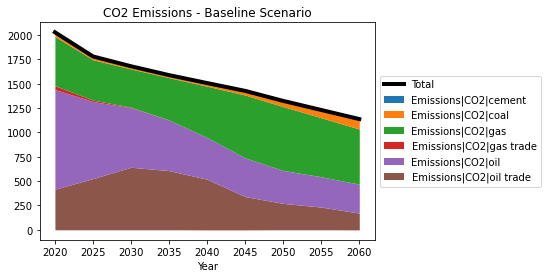

In [39]:
df_emis.filter(scenario = 'Baseline*', variable=
    ["Emissions|CO2|gas",
    "Emissions|CO2|oil",
    "Emissions|CO2|coal",
    "Emissions|CO2|cement",
    "Emissions|CO2|oil trade",
    "Emissions|CO2|gas trade"],
              year = plotyrs).stack_plot(total=True,
                                         title = 'CO2 Emissions - Baseline Scenario')

In [40]:
df_emis.aggregate('Emissions|*').timeseries()

1950  1955  1960  1965  \
model            scenario     region variable    unit                           
MESSAGEix-Canada Baseline-NDC Canada Emissions|*        0.0   0.0   0.0   0.0   

                                                       1970  1975  1980  1985  \
model            scenario     region variable    unit                           
MESSAGEix-Canada Baseline-NDC Canada Emissions|*        0.0   0.0   0.0   0.0   

                                                       1990  1995  ...  2015  \
model            scenario     region variable    unit              ...         
MESSAGEix-Canada Baseline-NDC Canada Emissions|*        0.0   0.0  ...   0.0   

                                                               2020  \
model            scenario     region variable    unit                 
MESSAGEix-Canada Baseline-NDC Canada Emissions|*       1.241727e+06   

                                                               2025  \
model            scenario     region variable    unit                 
MESSAGEix-Canada Baseline-NDC Canada Emissions|*       1.073569e+06   

                                                                2030  \
model            scenario     region variable    unit                  
MESSAGEix-Canada Baseline-NDC Canada Emissions|*       927044.986132   

                                                                2035  \
model            scenario     region variable    unit                  
MESSAGEix-Canada Baseline-NDC Canada Emissions|*       710773.610227   

                                                                2040  \
model            scenario     region variable    unit                  
MESSAGEix-Canada Baseline-NDC Canada Emissions|*       508205.779137   

                                                                2045  \
model            scenario     region variable    unit                  
MESSAGEix-Canada Baseline-NDC Canada Emissions|*       365273.173574   

                                                                2050  \
model            scenario     region variable    unit                  
MESSAGEix-Canada Baseline-NDC Canada Emissions|*       213585.944538   

                                                               2055  \
model            scenario     region variable    unit                 
MESSAGEix-Canada Baseline-NDC Canada Emissions|*       93060.139304   

                                                               2060  
model            scenario     region variable    unit                
MESSAGEix-Canada Baseline-NDC Canada Emissions|*       25983.323977  

[1 rows x 23 columns]

In [41]:

coal = ['Total Costs|coal_adv',
        'Total Costs|coal_adv_ccs',
        'Total Costs|coal_bal',
        'Total Costs|coal_exp',
        'Total Costs|coal_extr',
        'Total Costs|coal_extr_ch4',
        'Total Costs|coal_gas',
        'Total Costs|coal_hpl',
        'Total Costs|coal_i',
        'Total Costs|coal_imp',
        'Total Costs|coal_ppl',
        'Total Costs|coal_ppl_u',
        'Total Costs|coal_rc',
        'Total Costs|coal_ppl',
        'Total Costs|coal_ppl_u',
       'Total Costs|coal_t_d',
       'Total Costs|syn_liq',
        'Total Costs|meth_coal',
       'Total Costs|lignite_extr']
biomass = ['bio_hpl', 'bio_ppl',
          'Total Costs|liq_bio']


elec = ['Total Costs|elec_exp',
        'Total Costs|elec_i',
        'Total Costs|elec_imp',
        'Total Costs|elec_t_d',
        'Total Costs|elec_trp']

oil = ['Total Costs|foil_i',
    'Total Costs|foil_imp',
    'Total Costs|foil_ppl',
    'Total Costs|oil_extr_1'
    'Total Costs|oil_extr_1_ch4'
    'Total Costs|oil_extr_2',
    'Total Costs|oil_extr_3',
    'Total Costs|oil_extr_4',
    'Total Costs|oil_extr_5',
    'Total Costs|oil_extr_6',
    'Total Costs|oil_extr_7',
    'Total Costs|oil_extr_2_ch4',
    'Total Costs|oil_extr_3_ch4',
    'Total Costs|loil_cc',
    'Total Costs|loil_ppl']
gas = ['Total Costs|gas_bal',
    'Total Costs|gas_bio',
    'Total Costs|gas_cc',
    'Total Costs|gas_cc_ccs',
    'Total Costs|gas_ct',
    'Total Costs|gas_extr_1',
    'Total Costs|gas_extr_2',
    'Total Costs|gas_extr_3',
    'Total Costs|gas_extr_4',
    'Total Costs|gas_extr_5',
    'Total Costs|gas_extr_6',
    'Total Costs|gas_extr_mpen',
    'Total Costs|gas_fs',
    'Total Costs|gas_hpl',
    'Total Costs|gas_i',
    'Total Costs|gas_imp',
    'Total Costs|gas_ppl',
    'Total Costs|gas_rc',
    'Total Costs|gas_t_d',
    'Total Costs|gas_t_d_ch4',
    'Total Costs|gas_trp',
      'Total Costs|igcc']

geo_ppl = ['Total Costs|geo_hpl','Total Costs|geo_ppl']

solar = ['Total Costs|solar_i',
        'Total Costs|solar_pv_ppl',
        'Total Costs|solar_rc',
        'Total Costs|solar_th_ppl']

wind = ['Total Costs|wind_curtailment1',
'Total Costs|wind_curtailment2',
'Total Costs|wind_curtailment3',
'Total Costs|wind_ppf',
'Total Costs|wind_ppl']

hydro = ['Total Costs|hydro_hc',
'Total Costs|hydro_lc']

nuclear = ['Total Costs|nuc_lc']


In [42]:
df_cost = pyam_df.copy()


df_cost.aggregate(
    "Total Costs|coal",
    components=coal,
    append=True
)

df_cost.aggregate(
    "Total Costs|biomass",
    components=biomass,
    append=True
)

df_cost.aggregate(
    "Total Costs|electricity",
    components=elec,
    append=True
)

df_cost.aggregate(
    "Total Costs|oil",
    components=biomass,
    append=True
)

df_cost.aggregate(
    "Total Costs|gas",
    components=gas,
    append=True
)

df_cost.aggregate(
    "Total Costs|geothermal",
    components=geo_ppl,
    append=True
)

df_cost.aggregate(
    "Total Costs|solar",
    components=solar,
    append=True
)

df_cost.aggregate(
    "Total Costs|wind",
    components=wind,
    append=True
)

df_cost.aggregate(
    "Total Costs|hydro",
    components=hydro,
    append=True
)
df_cost.aggregate(
    "Total Costs|nuclear",
    components=nuclear,
    append=True
)

<ipython-input-43-af5ba4eb917f>:1: DeprecationWarning:

This method is deprecated and will be removed in future versions. Please use `IamDataFrame.plot.stack()`.



<AxesSubplot:title={'center':'Total (Operational+ Investment) Costs - Baseline'}, xlabel='Year', ylabel='USD / a / kW'>

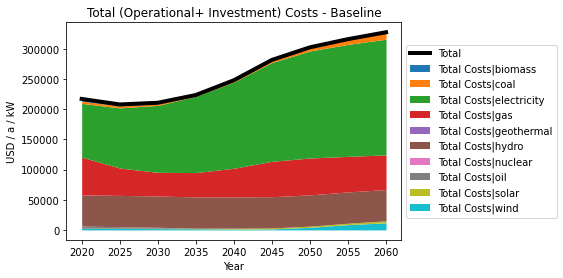

In [43]:
df_cost.filter(scenario = 'Baseline*', variable=
    ["Total Costs|coal","Total Costs|biomass",
    "Total Costs|electricity",
    "Total Costs|oil",
    "Total Costs|gas",
    "Total Costs|geothermal",
    "Total Costs|solar",
    "Total Costs|wind",
    "Total Costs|hydro",
    "Total Costs|nuclear"],
              year = plotyrs).stack_plot(total=True,
                                         title = 'Total (Operational+ Investment) Costs - Baseline')


In [44]:
useful_titles=["Useful Energy|non-Commercial biomass",
                "Useful Energy|residential/commercial thermal",
                "Useful Energy|residential/commercial specific",
                "Useful Energy|industrial thermal",
                "Useful Energy|industrial specific",
                "Useful Energy|industrial feedstock",
                "Useful Energy|transport"]

primary_titles=["Primary Energy|renewable|solar",
                 #"Primary Energy|LNG",
                "Primary Energy|gas",
                "Primary Energy|oil",
                "Primary Energy|biomass",
                "Primary Energy|renewable|wind",
                "Primary Energy|Liq. Hydrogen",
                "Primary Energy|methanol",
                "Primary Energy|ethanol",
                "Primary Energy|renewable|hydro",
                "Primary Energy|renewable|biomass",
                "Primary Energy|methanol",
                "Primary Energy|coal"]

emissions_titles=["Emissions|CO2|gas",
                    "Emissions|CO2|oil",
                    "Emissions|CO2|coal",
                    "Emissions|CO2|cement",
                    "Emissions|CO2|oil trade",
                    "Emissions|CO2|gas trade"]

total_titles=["Total Costs|coal","Total Costs|biomass",
                "Total Costs|electricity",
                "Total Costs|oil",
                "Total Costs|gas",
                "Total Costs|geothermal",
                "Total Costs|solar",
                "Total Costs|wind",
                "Total Costs|hydro",
                "Total Costs|nuclear"]


message_plot_dictionary = dict()
message_plot_dictionary["Useful"] = dict(df=df_useful, titles=useful_titles, years=[2020,2025,2030,2035,2040,2045,2050,2055,2060])
message_plot_dictionary["Primary"] = dict(df=primary_df, titles = primary_titles, years=[2020,2025,2030,2035,2040,2045,2050,2055,2060])
message_plot_dictionary["Emissions"] = dict(df=df_emis, titles=emissions_titles ,years=[2020,2025,2030,2035,2040,2045,2050,2055,2060])
message_plot_dictionary["Total"] = dict(df=df_cost,titles=total_titles,years=[2020,2025,2030,2035,2040,2045,2050,2055,2060])


In [45]:
%matplotlib inline
# magic function in Python

def string_to_value(long_string):
        long_string.replace("]","0")
        #print(long_string)
        
        split_string = long_string.split(" ")
      
        value = split_string[-1]
        value = value.rstrip(value[-1])
       
        #value = value[:-1]
        print(split_string)
        print(split_string[-1])
        return value

In [46]:
def plotting_message(plot_name, scenario='Baseline*'):
    year_list = message_plot_dictionary[plot_name]["years"]
    print("Year List")
    print(year_list)

    all_y_data = [] # (list of lists)

    new_y_title_list = []
    
    # get the y_title_list for the current plot 
    y_tile_list = message_plot_dictionary[plot_name]["titles"]
    
    for y_title in y_tile_list:
        y_data = produce_message_list(y_title, plot_name, scenario)
        
        #ignore empty datasets
        if len(y_data) > 0: 
            all_y_data.append(y_data)
            new_y_title_list.append(y_title)
        else:
            print("FOUND EMPTY DATASET: EXCLUDING")
    
    fig = Figure()
    FigureCanvas(fig) # not needed in mpl >= 3.1
    fig.set_size_inches(18.5, 10.5)
    ax = fig.add_subplot()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])
    ax.stackplot(year_list, *all_y_data, labels=new_y_title_list)
       # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 18})
    ax.set_xlabel("Years")
    ax.set_ylabel("Values (GWA)")
    
   
    

    
    return fig

In [47]:
def produce_message_list(title, Variable, scenario = 'Baseline*'):
    plotdf = message_plot_dictionary[Variable]["df"]
    foo = plotdf.filter(scenario = 'Baseline*', variable = title, year = plotyrs)
    container = []
    for i in foo.data.values:
        bar = str(i)
        test_value = string_to_value(bar)

        num = float(test_value)
        container.append(num)
    return container


In [48]:
def change_plot(Variable, view_fn=plotting_message,  scenario = "Baseline*", message_text="Hi There!"):
    return view_fn(Variable, scenario=scenario)

In [49]:
message_text = "<br>\n# MESSAGEix-Canada \n <b> Post-processed outputs from Canadian IAM \n \n Brief Description: \n \n MESSAGEix-Canada is a national scale Integrated Assessment Model (IAM) based on the MESSAGEix framework developed by the International Institute of Applied Systems Analysis (IIASA). The IAM simulates subregion energy mix outlooks based on exogenously defined demands for energy in the industrial, residential/commercial, and transport sectors. The demands are generated using population, urbanisation, and GDP projections consistent with the Shared Socioeconomic Pathways (SSP). The subregion analysis in this project focuses on the middle-of-the-road scenario (SSP2)."


interact_dict = dict(Variable=["Primary","Useful","Emissions","Total"], scenario = "Baseline*", y="Hi There!",z="Hi There!")
message_function = pn.interact(change_plot, **interact_dict)


message_plot = pn.Row(message_function[1][0], pn.Column(message_text, message_function[0][0], message_function[0][1]))



pyam.core - WARNING: Filtered IamDataFrame is empty!
pyam.core - WARNING: Filtered IamDataFrame is empty!
pyam.core - WARNING: Filtered IamDataFrame is empty!
pyam.core - WARNING: Filtered IamDataFrame is empty!
pyam.core - WARNING: Filtered IamDataFrame is empty!
pyam.core - WARNING: Filtered IamDataFrame is empty!
pyam.core - WARNING: Filtered IamDataFrame is empty!


Year List
[2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060]
["['MESSAGEix-Canada'", "'Baseline-NDC'", "'Canada|Canada'\n", "'Primary", "Energy|renewable|solar'", "'GWa'", '2020', '2.89518]']
2.89518]
["['MESSAGEix-Canada'", "'Baseline-NDC'", "'Canada|Canada'\n", "'Primary", "Energy|renewable|solar'", "'GWa'", '2025', '2.89518]']
2.89518]
["['MESSAGEix-Canada'", "'Baseline-NDC'", "'Canada|Canada'\n", "'Primary", "Energy|renewable|solar'", "'GWa'", '2030', '2.89518]']
2.89518]
["['MESSAGEix-Canada'", "'Baseline-NDC'", "'Canada|Canada'\n", "'Primary", "Energy|renewable|solar'", "'GWa'", '2035', '5.392803031000001]']
5.392803031000001]
["['MESSAGEix-Canada'", "'Baseline-NDC'", "'Canada|Canada'\n", "'Primary", "Energy|renewable|solar'", "'GWa'", '2040', '10.99529949]']
10.99529949]
["['MESSAGEix-Canada'", "'Baseline-NDC'", "'Canada|Canada'\n", "'Primary", "Energy|renewable|solar'", "'GWa'", '2045', '21.35485877]']
21.35485877]
["['MESSAGEix-Canada'", "'Baseline-NDC'", "'Canada|Canada'\

Note that the widgets stay linked to their plot even if they are in a different notebook cell:

In [50]:


test = pn.serve({'Message': message_plot ,'Buildings': buildings_plot, 'COPPER': copper_plot, 'SILVER': silver_plot, 'Transport': transport_plot})

#s = pn.serve(panels = r)
#t = pn.serve(panels = p)

Launching server at http://localhost:60228
